## 데이터 변환

### 스케일링 vs 데이터 변환
#### 1. 스케일링의 목적
- 스케일링은 데이터를 일정한 범위로 조정하여 모델 훈련 시 변수 간의 크기 차이로 인한 영향을 줄이는 데 목적이 있습니다.
- 컬럼별로 변동 폭이 너무 다를 때, 이를 비슷하게 맞춰주기 위해서 스케일링을 실시하며 데이터가 한 쪽이 치우쳐 있는(skew) 등의 데이터 자체 편향을 조정해주지는 않는다.
- 즉, 각 피쳐 컬럼별 데이터의 스케일을 맞춰주는 작업이지, 데이터의 전체적인 통계적 속성을 바꿔주는 작업은 아니다.

#### 2. 데이터 변환의 목적
- 데이터가 편향되어 있다면 어느정도 정규분포에 맞도록 변환시켜주는 등 데이터 변환 작업은 데이터의 전체적인 통계적 속성을 바꿔주어 모델 훈련이 더 안정적으로 이루어질 수 있도록 하는 것이 목적이다.
- 데이터를 정규 분포에 가깝게 변환, 편향을 완화하도록 변환, 비선형 관계를 선형 관계로 변환하는 등의 작업이 이루어진다.

#### 3. 주요 데이터 변환 방법
![](https://velog.velcdn.com/images/newnew_daddy/post/b811e45c-0dfb-4b13-8322-3a65f97a87ad/image.png)

- 로그 변환, 제곱근 변환, Box-Cox 변환, Yeo-Johnson
- 왜도(Skewness) 측정 -> https://wikidocs.net/156776

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./dataset/transform.csv")

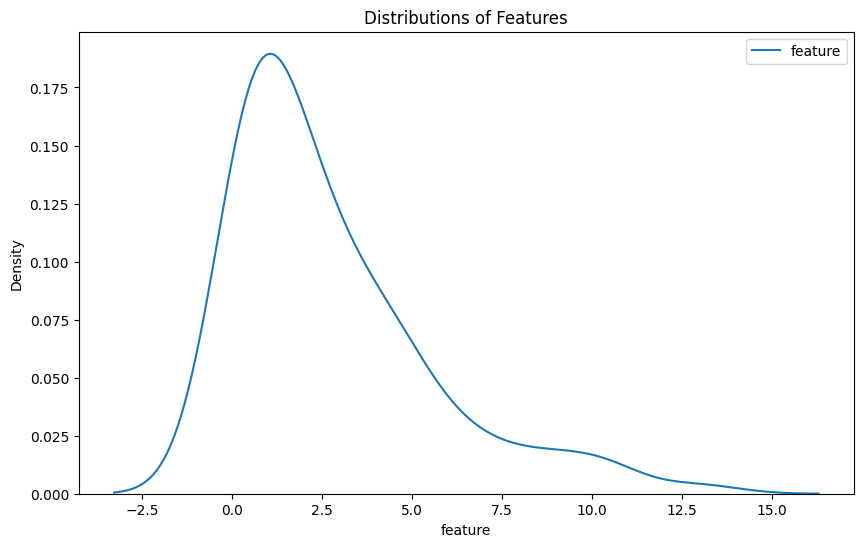

In [16]:
# 정규분포 시각화 (하나의 그래프에 선형 그래프만)
plt.figure(figsize=(10, 6))

sns.kdeplot(df['feature'], label='feature')

plt.title('Distributions of Features')
plt.legend()
plt.show()

In [ ]:
## kdeplot 생성 함수

def show_kde(df: pd.DataFrame, df_t:pd.DataFrame, col_name: str = 'feature'):
    
    plt.figure(figsize=(10, 6))
    
    sns.kdeplot(df[col_name], label=col_name)
    sns.kdeplot(df_t[col_name], label=f"transformed_{col_name}")

    plt.title('Distributions of Features')
    plt.legend()
    plt.show()

#### 1. 로그 변환
- 데이터의 분포를 정규 분포에 가깝게 만들기 위해 사용합니다. 주로 양의 값에 대해 적용되며, 데이터의 스케일을 줄이는 데 효과적입니다.

In [ ]:
log_t = np.log(df)

show_kde(df, log_t, 'feature')

#### 2. 제곱근 변환
- 데이터의 분포를 안정화하고 왜곡을 줄이기 위해 사용됩니다. 양의 값에 대해 적용되며, 주로 데이터의 분포가 양의 편향을 가질 때 사용됩니다.

In [ ]:
sqrt_t = np.sqrt(df)

show_kde(df, sqrt_t, 'feature')

#### 3. Box-Cox 변환
- 특정 파라미터 λ(lambda)에 따라 데이터의 분포를 정규화하는 변환입니다. 양의 값에 대해 적용되며, 최적의 λ값을 찾아 데이터의 분포를 정규 분포에 가깝게 만듭니다.

In [ ]:
from scipy.stats import boxcox

boxcox_, _ = boxcox(df['feature'].tolist())
boxcox_t = pd.DataFrame(boxcox_, columns=['feature'])

show_kde(df, boxcox_t, 'feature')

#### 4. Yeo-Johnson 변환
- Box-Cox 변환의 확장으로, 음수와 0을 포함한 모든 실수 데이터에 적용할 수 있습니다. 데이터를 정규 분포에 가깝게 변환합니다.

In [ ]:
from sklearn.preprocessing import PowerTransformer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

pt = PowerTransformer(method='yeo-johnson') # box-cox
yj_ = pt.fit_transform(df[['feature']])

yj_t = pd.DataFrame(yj_, columns=['feature'])

show_kde(df, yj_t, 'feature')

#### 5. Custom 변환
- 사용자가 지정한 함수의 기능대로 데이터 변환 작업을 수행할 수 있다.

In [ ]:
from sklearn.preprocessing import FunctionTransformer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html

# log_transformer = FunctionTransformer(np.log1p, validate=True)
# data_log = log_transformer.transform(df)

def half_func(x):
    return x / 2

half_transformer = FunctionTransformer(half_func, validate=True)
data_half = half_transformer.transform(df)

data_half = pd.DataFrame(data_half, columns=['feature'])

show_kde(df, data_half, 'feature')